In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_wine


%matplotlib inline
sns.set()

In [2]:
wine = load_wine()
X, y = wine.data, wine.target
labels = wine.feature_names
target_labels = wine.target_names

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg = LogisticRegression(max_iter=1e5).fit(X_train, y_train)
print(f'In-sample score: {logreg.score(X_train, y_train)}')
print(f'Out-sample score: {logreg.score(X_test, y_test)}')

In-sample score: 0.9919354838709677
Out-sample score: 1.0


In [4]:
logreg.predict_proba(wine.data[:1])

array([[9.99649319e-01, 6.81834069e-05, 2.82498025e-04]])

### LinearSVC
It's same as SVC(kernel='linear') but provides greater flexibility in choosing penalties and scales better
for big amount of data


In [5]:
Xst = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xst, y, test_size=0.3, random_state=42)

svc = LinearSVC().fit(X_train, y_train)
print(f'In-sample score: {svc.score(X_train, y_train)}')
print(f'Out-sample score: {svc.score(X_test, y_test)}')

In-sample score: 1.0
Out-sample score: 0.9814814814814815


## Logistic Regression vs SVM loss functions


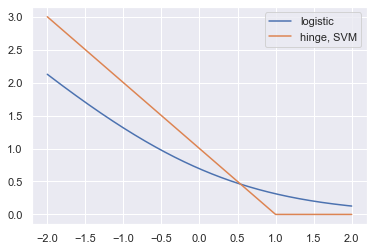

In [10]:
# Mathematical functions for logistic and hinge losses
def log_loss(raw_model_output):
   return np.log(1+np.exp(-raw_model_output))
def hinge_loss(raw_model_output):
   return np.maximum(0,1-raw_model_output)

# Create a grid of values and plot
grid = np.linspace(-2,2,1000)
plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge, SVM')
plt.legend()
plt.show()

# WRITE ABOUT REGULARIZATION DIFFERENCES



In [20]:
# unstandardized version

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# more and less regularization. Big C value -> less regularization, small C the opposite
lr_weak_reg = LogisticRegression(C=1e4, max_iter=1e5).fit(X_train, y_train)
lr_strong_reg = LogisticRegression(C=1e-2, max_iter=1e5).fit(X_train, y_train)

print('UNSTANDARDIZED VERSION')
print(f'In-sample weak regularization: {round(lr_weak_reg.score(X_train, y_train), 3)}')
print(f'In-sample strong regularization: {round(lr_strong_reg.score(X_train, y_train), 3)}')
print('\n============================\n')
print(f'Out-sample weak regularization: {round(lr_weak_reg.score(X_test, y_test), 3)}')
print(f'Out-sample strong regularization: {round(lr_strong_reg.score(X_test, y_test), 3)}')

UNSTANDARDIZED VERSION
In-sample weak regularization: 0.99
In-sample strong regularization: 0.945


Out-sample weak regularization: 0.977
Out-sample strong regularization: 0.965


In [21]:
# standardized version
Xs = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3, random_state=42, shuffle=True)

# more and less regularization. Big C value -> less regularization, small C the opposite
lr_weak_reg = LogisticRegression(C=1e4, max_iter=1e5).fit(X_train, y_train)
lr_strong_reg = LogisticRegression(C=1e-2, max_iter=1e5).fit(X_train, y_train)

print('STANDARDIZED VERSION')
print(f'In-sample weak regularization: {round(lr_weak_reg.score(X_train, y_train), 3)}')
print(f'In-sample strong regularization: {round(lr_strong_reg.score(X_train, y_train), 3)}')
print('\n============================\n')
print(f'Out-sample weak regularization: {round(lr_weak_reg.score(X_test, y_test), 3)}')
print(f'Out-sample strong regularization: {round(lr_strong_reg.score(X_test, y_test), 3)}')


STANDARDIZED VERSION
In-sample weak regularization: 1.0
In-sample strong regularization: 0.95


Out-sample weak regularization: 0.942
Out-sample strong regularization: 0.959


## Lasso & Ridge for Logistic Regression


No handles with labels found to put in legend.


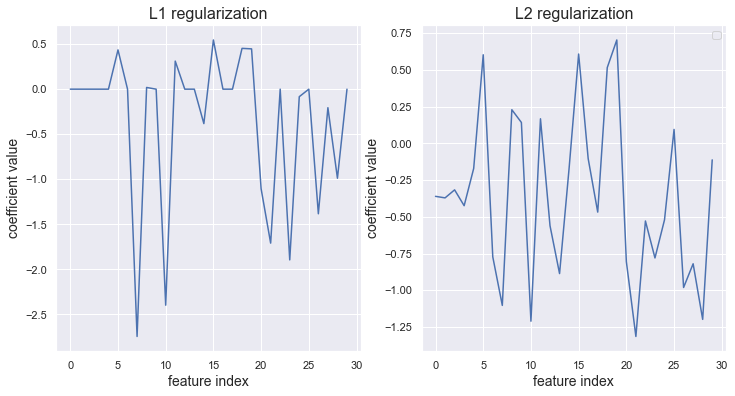

In [47]:
l1_reg = LogisticRegression(penalty='l1', solver='liblinear').fit(X_train, y_train)
l2_reg = LogisticRegression().fit(X_train, y_train)  # default L2


fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(l1_reg.coef_.flatten())
ax[0].set_title('L1 regularization', size=16)
ax[1].plot(l2_reg.coef_.flatten())
ax[1].set_title('L2 regularization', size=16)

ax[0].set_xlabel('feature index', size=14)
ax[1].set_xlabel('feature index', size=14)
ax[0].set_ylabel('coefficient value', size=14)
ax[1].set_ylabel('coefficient value', size=14)
plt.legend()
plt.show()

### Effect of L2 regularization


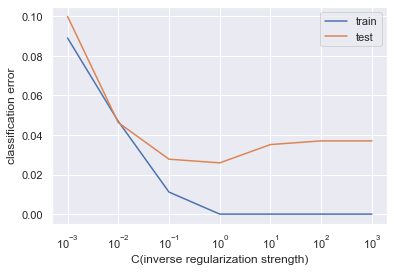

In [50]:
# hand-written digits
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)
Xs = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3, random_state=101, shuffle=True)

train_errors = list()
test_errors = list()

c_vals = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

for c_value in c_vals:
    lr = LogisticRegression(C=c_value, max_iter=1e5).fit(X_train, y_train)
    train_errors.append(1 - lr.score(X_train, y_train))
    test_errors.append(1- lr.score(X_test, y_test))

plt.semilogx(c_vals, train_errors, c_vals, test_errors)
plt.legend(('train', 'test'))
plt.xlabel('C(inverse regularization strength)')
plt.ylabel('classification error')
plt.show()

### Too small & too large coefficients do not work well


## GridSearchCV


In [69]:
from sklearn.model_selection import GridSearchCV

#
log_reg = LogisticRegression(penalty='l1', solver='liblinear')

# instantiate GridSearchCV & run the search
grid_search = GridSearchCV(log_reg, {'C': [0.001, 0.01, 0.1, 1, 10]}, refit=True).fit(X_train, y_train)

print(f'Best Params: {grid_search.best_params_}')

best_features = grid_search.best_estimator_
coefs = best_features.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

# for k, v in grid_search.cv_results_.items():
#     print(f'{k}: {v}')


Best Params: {'C': 1}
Total number of features: 640
Number of selected features: 328


In [70]:
from sklearn.metrics import classification_report

# usual logistic regression
logistic = LogisticRegression(max_iter=1e4).fit(X_train, y_train)
y_pred = logistic.predict(X_test)
print(classification_report(y_test, y_pred))

# gridsearchcv version
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.93      0.96      0.95        55
           2       1.00      1.00      1.00        49
           3       0.98      0.98      0.98        54
           4       0.97      0.97      0.97        61
           5       0.98      0.98      0.98        59
           6       1.00      0.96      0.98        46
           7       1.00      0.96      0.98        56
           8       0.92      0.93      0.92        59
           9       0.98      1.00      0.99        48

    accuracy                           0.97       540
   macro avg       0.98      0.97      0.98       540
weighted avg       0.97      0.97      0.97       540

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        53
           1       0.93      0.96      0.95        55
           2       1.00      1.00      1.00        49
           3       0.98 

In [52]:
# trial with L2

#
log_reg = LogisticRegression(max_iter=1e5)

# instantiate GridSearchCV & run the search
grid_search = GridSearchCV(log_reg, {'C': [0.001, 0.01, 0.1, 1, 10]}, return_train_score=True).fit(X_train, y_train)

print(f'Best Params: {grid_search.best_params_}')

best_features = grid_search.best_estimator_
coefs = best_features.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

## Multiclass Logistic Regression



In [87]:
from scipy.stats import describe

wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target
X, y = load_wine(return_X_y=True)
Xs = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.25, shuffle=True, random_state=101)
# one-vs-rest approach
logreg = LogisticRegression().fit(X_train, y_train)
print(logreg.predict_proba(X[:1, :]))
print(logreg.decision_function(X)[0])  # confidence scores
print(logreg.predict(X[:1, :]))
print(logreg.coef_.shape)

[[1. 0. 0.]]
[1101.35870758 -998.90372298 -102.45498459]
[0]
(3, 13)


In [88]:
# ovr approach
logreg = LogisticRegression().fit(X_train, y_train)
print("OVR training accuracy:", logreg.score(X_train, y_train))
print("OVR test accuracy    :", logreg.score(X_test, y_test))

logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
print("Softmax training accuracy:", logreg.score(X_train, y_train))
print("Softmax test accuracy    :", logreg.score(X_test, y_test))

OVR training accuracy: 1.0
OVR test accuracy    : 1.0
Softmax training accuracy: 1.0
Softmax test accuracy    : 1.0


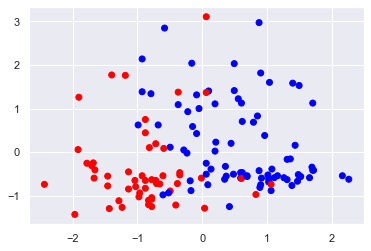

In [107]:
# training an ovr algorithm
class_1_clf = LogisticRegression().fit(X_train, y_train==1)
y_pred = class_1_clf.predict(X_train)
colors = ['red' if x else 'blue' for x in y_pred]

plt.scatter(X_train[:, 0], X_train[:, 1], c=colors)
